# Import the libraries and the data

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('AER_credit_card_data.csv')

In [3]:
data.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [4]:
data.shape

(1319, 12)

## Data Preparation

In [5]:
data = data.replace(['yes','no'],[1,0])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1319 non-null   int64  
 1   reports      1319 non-null   int64  
 2   age          1319 non-null   float64
 3   income       1319 non-null   float64
 4   share        1319 non-null   float64
 5   expenditure  1319 non-null   float64
 6   owner        1319 non-null   int64  
 7   selfemp      1319 non-null   int64  
 8   dependents   1319 non-null   int64  
 9   months       1319 non-null   int64  
 10  majorcards   1319 non-null   int64  
 11  active       1319 non-null   int64  
dtypes: float64(4), int64(8)
memory usage: 123.8 KB


In [7]:
data.describe()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,0.775588,0.456406,33.213103,3.365376,0.068732,185.057071,0.440485,0.068992,0.993935,55.267627,0.817286,6.996967
std,0.417353,1.345267,10.142783,1.693902,0.094656,272.218917,0.496634,0.253536,1.247745,66.271746,0.386579,6.305812
min,0.000000,0.000000,0.166667,0.210000,0.000109,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,25.416670,2.243750,0.002316,4.583333,0.000000,0.000000,0.000000,12.000000,1.000000,2.000000
50%,1.000000,0.000000,31.250000,2.900000,0.038827,101.298300,0.000000,0.000000,1.000000,30.000000,1.000000,6.000000
75%,1.000000,0.000000,39.416670,4.000000,0.093617,249.035800,1.000000,0.000000,2.000000,72.000000,1.000000,11.000000
max,1.000000,14.000000,83.500000,13.500000,0.906320,3099.505000,1.000000,1.000000,6.000000,540.000000,1.000000,46.000000


In [8]:
y = data['card']
X = data.drop(['card'], axis=1)

## Data split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25 , random_state=1)

In [11]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(791, 11) (791,)
(264, 11) (264,)
(264, 11) (264,)


## Question 1

In [13]:
from sklearn.metrics import roc_auc_score

In [14]:
cols = ['reports','dependents','active','share','age','income','expenditure','months','majorcards']

for col in cols:
    score = roc_auc_score(y_train, X_train[col])
    print(f"{col:10.10} : has an AUC score: {round(score,3):10.3f}")

reports    : has an AUC score:      0.283
dependents : has an AUC score:      0.467
active     : has an AUC score:      0.604
share      : has an AUC score:      0.989
age        : has an AUC score:      0.476
income     : has an AUC score:      0.591
expenditur : has an AUC score:      0.991
months     : has an AUC score:      0.471
majorcards : has an AUC score:      0.534


### Answer: 

out of the four features 'reports','dependents','active' and 'share', it is 'share' that has the highest AUC score.

## Question 2

In [15]:
cols = ["reports", "age", "income", "share", "expenditure", "dependents", "months", "majorcards", "active", "owner", "selfemp"]

In [16]:
X_train = X_train[cols]
X_test = X_test[cols]
X_val = X_val[cols]

In [17]:
from sklearn.feature_extraction import DictVectorizer

In [18]:
dv = DictVectorizer(sparse=False)
X_train_dic = X_train.to_dict(orient='records')
X_train_ohe = dv.fit_transform(X_train_dic)

In [19]:
X_val_dic = X_val.to_dict(orient='records')
X_val_ohe = dv.transform(X_val_dic)

In [20]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [21]:
logreg.fit(X_train_ohe, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [22]:
y_val_pred = logreg.predict_proba(X_val_ohe)[:,1]

In [23]:
print(round(roc_auc_score(y_val, y_val_pred),3))

0.995


### Answer:

The AUC score on the validation dataset is 0.995.

## Question 3

In [25]:
thresholds = np.linspace(0,1,101)

In [26]:
precision = []
recall = []

for thr in thresholds:
    predict_positive = (y_val_pred >= thr)
    predict_negative = (y_val_pred < thr)
    
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    pr = tp / (tp + fp)
    re = tp / (tp + fn)
    
    precision.append(pr)
    recall.append(re)

In [27]:
import matplotlib.pyplot as plt

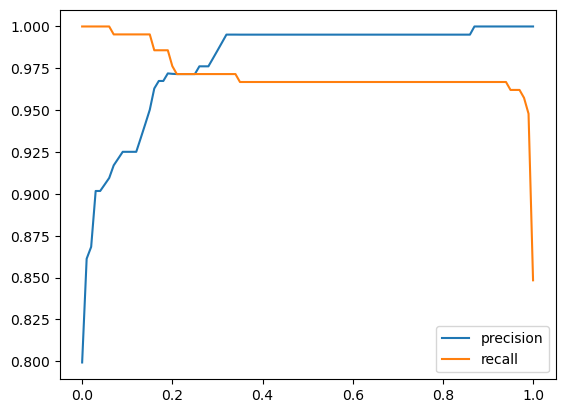

In [28]:
plt.plot(thresholds, precision, label="precision")
plt.plot(thresholds, recall, label="recall")
plt.legend()

### Answer:

The two curves intersect for a threshold of 0.3

## Question 4

In [33]:
p = np.array(precision)
r = np.array(recall)
f1 =  (2*p*r)/(p + r)

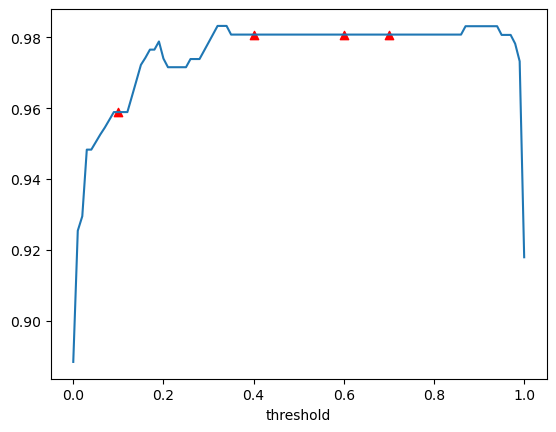

In [34]:
plt.plot(thresholds, f1, label='f1 score')
plt.xlabel('threshold')
plt.scatter([0.1, 0.4, 0.6, 0.7], [f1[10], f1[40], f1[60], f1[70]], color='r', marker='^')

### Answer

The F1 score is maximal and the same for a threshold of 0.4, 0.6 and 0.7

## Question 5

In [36]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=1)

In [37]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25 , random_state=1)

In [38]:
folds = kf.split(X_temp, y_temp)

In [39]:
logreg_fold = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [40]:
auc_scores = []

for train_index, val_index in folds:
    X_train_fold = X_temp.iloc[train_index]
    X_val_fold = X_temp.iloc[val_index]
    
    dv = DictVectorizer(sparse=False)
    X_train_fold = X_train_fold.to_dict(orient='records')
    X_train_fold = dv.fit_transform(X_train_fold)
    
    X_val_fold = X_val_fold.to_dict(orient='records')
    X_val_fold = dv.transform(X_val_fold)
    
    
    y_train_fold = y_temp.iloc[train_index]
    y_val_fold = y_temp.iloc[val_index]
    
    logreg_fold.fit(X_train_fold, y_train_fold)
    
    y_val_fold_pred = logreg_fold.predict_proba(X_val_fold)[:,1]
    
    score = round(roc_auc_score(y_val_fold, y_val_fold_pred),3)
    auc_scores.append(score)

In [41]:
auc_scores

[0.994, 0.993, 0.995, 1.0, 1.0]

In [42]:
auc_scores = np.array(auc_scores)
round(auc_scores.std(),3)

0.003

### Answer:

 standard devidation of the AUC scores across different folds is : 0.003

## Question 6

In [43]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=1)

folds = kf.split(X_temp, y_temp)

In [44]:
C = [0.01, 0.1, 1, 10]

In [45]:
for c in C:
    logreg_fold = LogisticRegression(solver='liblinear', C=c, max_iter=1000)
    
    kf = KFold(n_splits=5, shuffle=True, random_state=1)

    folds = kf.split(X_train, y_train)
    
    auc_scores = []
    
    for train_index, val_index in folds:
        X_train_fold = X_temp.iloc[train_index]
        X_val_fold = X_temp.iloc[val_index]
    
        dv = DictVectorizer(sparse=False)
        X_train_fold = X_train_fold.to_dict(orient='records')
        X_train_fold = dv.fit_transform(X_train_fold)
    
        X_val_fold = X_val_fold.to_dict(orient='records')
        X_val_fold = dv.transform(X_val_fold)
    
    
        y_train_fold = y_temp.iloc[train_index]
        y_val_fold = y_temp.iloc[val_index]
    
        logreg_fold.fit(X_train_fold, y_train_fold)
    
        y_val_fold_pred = logreg_fold.predict_proba(X_val_fold)[:,1]
    
        score = round(roc_auc_score(y_val_fold, y_val_fold_pred),3)
        auc_scores.append(score)
    
    auc_scores = np.array(auc_scores)
    std = round(auc_scores.std(),3)
    mean = round(auc_scores.mean(),3)
    
    print(f"For C: {c}, the AUC score is {mean} +/- {std} ")

For C: 0.01, the AUC score is 0.991 +/- 0.011 
For C: 0.1, the AUC score is 0.993 +/- 0.007 
For C: 1, the AUC score is 0.997 +/- 0.004 
For C: 10, the AUC score is 0.997 +/- 0.004 


### Answer:

Which C leads to the best mean score: C=1 with mean score of 0.997